In [1]:
#import libraries
import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode('True')
import plotly.figure_factory as ff

import os
os.listdir('input')

['CC GENERAL.csv']

In [2]:
# Read dataframe
df = pd.read_csv('input/CC GENERAL.csv')

Here are what each columns in this table mean:
- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Total amount of money that you owe to your credit card company
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

In [3]:
# checking out the head of the dataframe
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# describe the data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Data Cleaning

In [5]:
# Checking the percentage of missing data
(df.isnull().sum()/df['CUST_ID'].count())*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

> Here we have calculated the percentageg of data that are missing
>> There are two variables with missing data, namely CREDIT_LIMIT and MINIMU_PAYMENTS. The missing in these columns make up a insignificant percentage of the data set and can be safely deleted without risking a loss in data. The missing data in CREDIT_LIMIT make up less than 1% of the data and in MINIMUM_PAYMENTS only around 3%.

In [6]:
# Dropping the missing data
df.dropna(inplace=True)

In [7]:
# Dropping the customer id column
df.drop('CUST_ID', axis=1, inplace=True)

# EDA

In [8]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

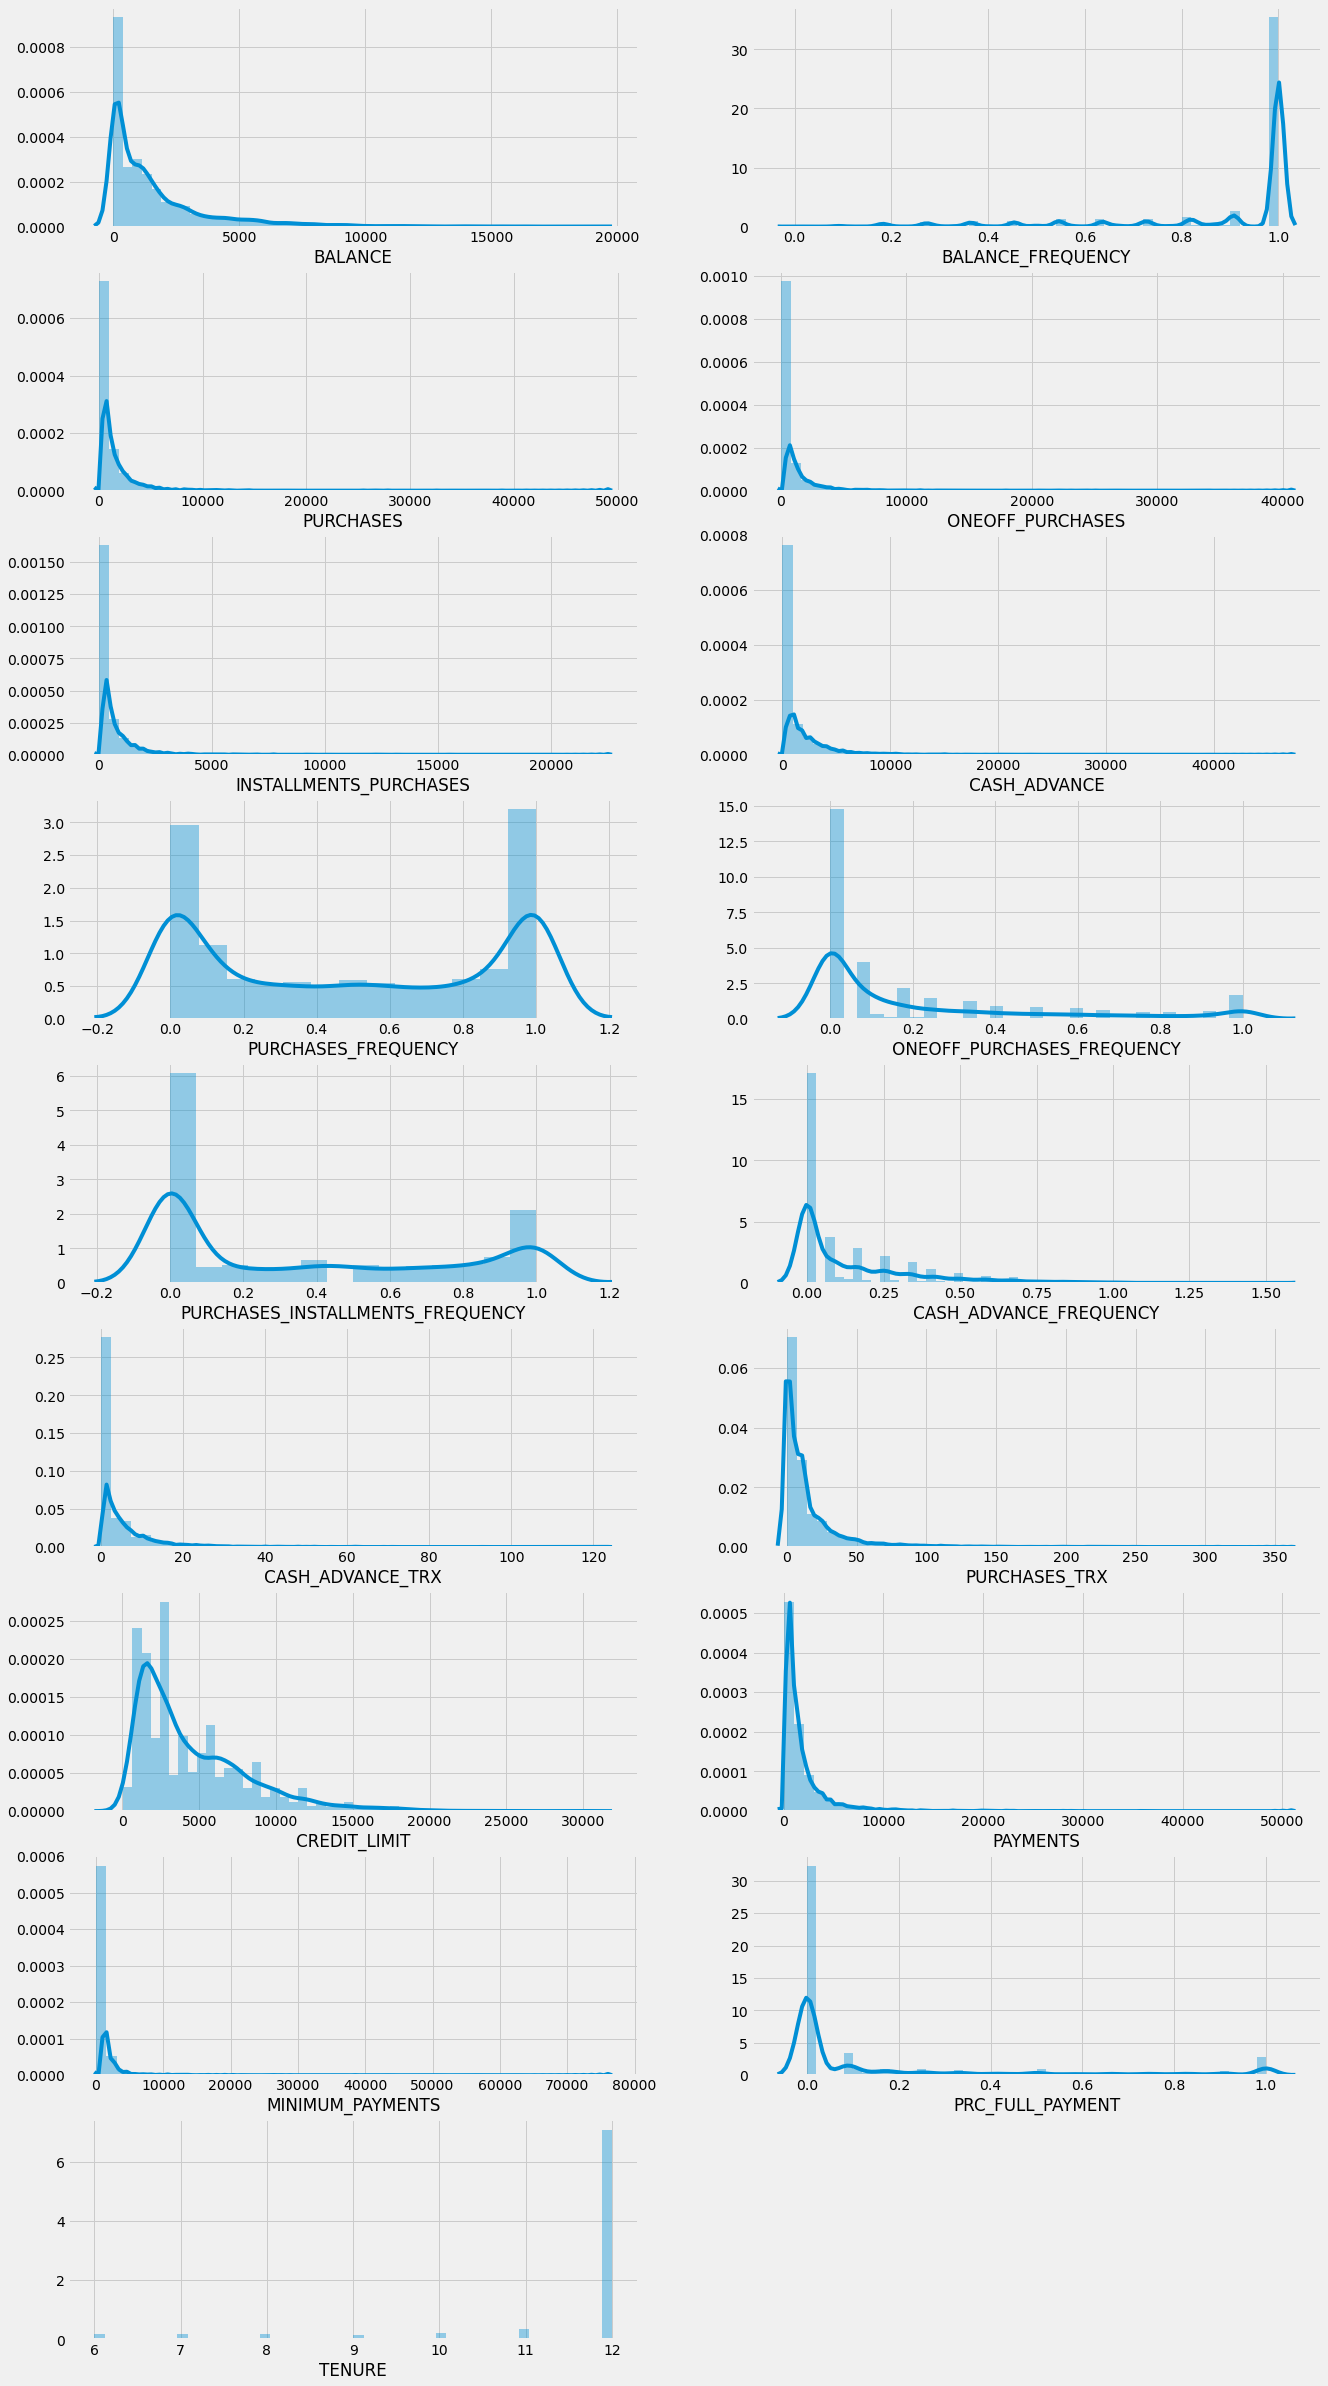

In [9]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] =(20,40)

for num in range(0,17):
    ax = plt.subplot(9,2,num+1)
    col = df.columns[num]
    sns.distplot(df[col], ax=ax)

> Above are the distribution plots of every variables in the dataframe
>> Here we have the overview of the whole distribution of the dataframe. We can see right away that these distributions are very left skewed and there are a lot of zero values. Let's explore the data furthur.

Text(0.5, 0, 'Balance')

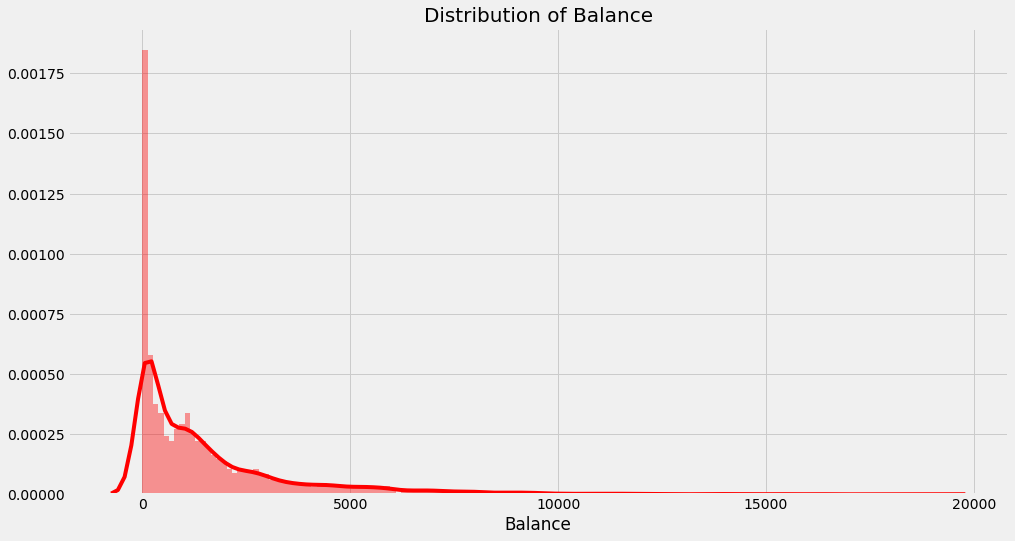

In [10]:
plt.rcParams['figure.figsize'] = (15,8)

sns.distplot(df['BALANCE'],bins=150, color='red')
plt.title('Distribution of Balance', size=20)
plt.xlabel('Balance')

> Above we have the distribution plot of the balance
>> Let's take a closer look at some variables in the dataset starting with balance. The distribution of balance (total amount of money that you owe to your credit card company) range from 0 to 20,000 dollars. The interesting thing is that there seems to be a very high number of credit card with 0 balance. This could be due because people are holding what is called "zero balance cards". The basic idea is that by keeping you balance low (in this case zero) but your credit limit high, this would increase your credit utilization ratio and in turn increases your credit score.
For more information: https://www.investopedia.com/terms/z/zero-balance-card.asp#:~:text=Key%20Takeaways,any%20purchases%20on%20their%20cards.

Text(0.5, 1.0, 'Counts of Balance Frequency Score')

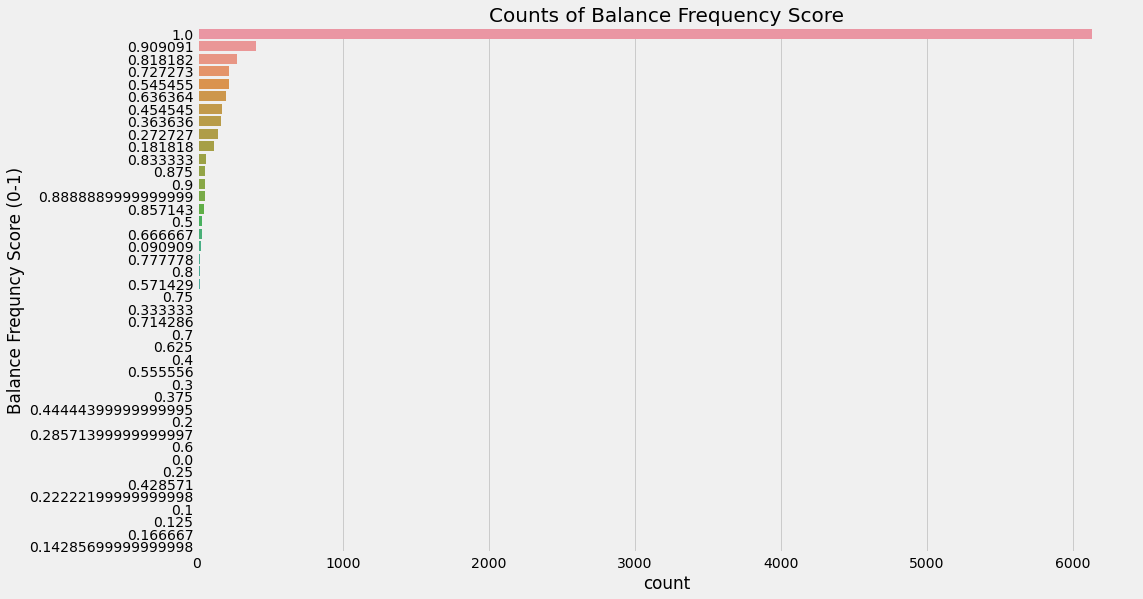

In [11]:
plt.rcParams['figure.figsize'] = (15,9)

sns.countplot(y=df['BALANCE_FREQUENCY'],order = df['BALANCE_FREQUENCY'].value_counts().index)
plt.ylabel('Balance Frequncy Score (0-1)')
plt.title('Counts of Balance Frequency Score', fontsize=20)

> Here we have the count plot of balance frequency
>> Balance frequency is the score, 0-1, given to accounts based on how frequent the account's balances are updated. One being the highest score. So basically it is the measure of how frequent people use their credit card. As we can see here most of the accounts have the score of one, the best score, meaning that most people do use credit card frequently and only a small number of people keep their cards relatively inactive.

Text(0.5, 0, 'Purchases')

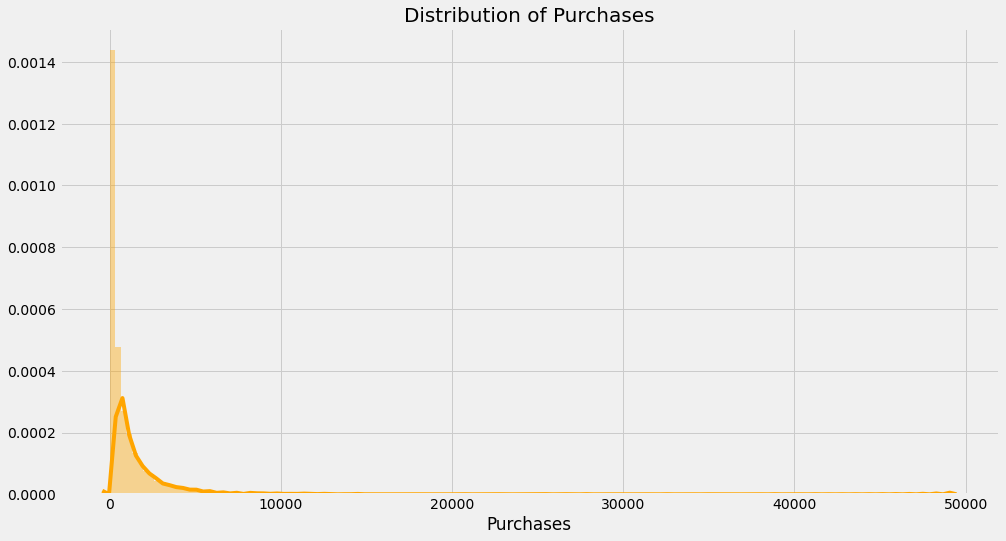

In [12]:
plt.rcParams['figure.figsize'] = (15,8)

sns.distplot(df['PURCHASES'], color='orange', bins=150)
plt.title('Distribution of Purchases', size=20)
plt.xlabel('Purchases')

> Here we have the distribution plot of purchases
>> A lot of people have the purchse amounts of 0 which make sense since earlier we also see that alot of people are holding zero balance cards.

Text(0.5, 0, 'Amount')

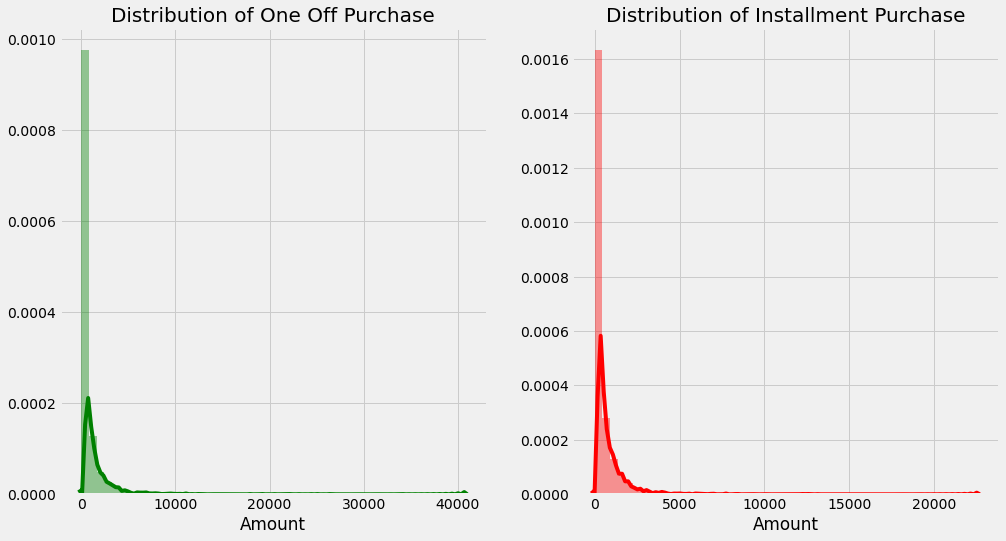

In [13]:
plt.subplot(1,2,1)
sns.distplot(df['ONEOFF_PURCHASES'],color='green')
plt.title('Distribution of One Off Purchase', fontsize = 20)
plt.xlabel('Amount')


plt.subplot(1,2,2)
sns.distplot(df['INSTALLMENTS_PURCHASES'], color='red')
plt.title('Distribution of Installment Purchase', fontsize = 20)
plt.xlabel('Amount')

>Above we have the comparison between the distribution of one off purchases and installment purchases
>> This still follows that same trend of zeros balance account. One off purchses go up as high as more than 40,000 dollars while the highest innstallment purchases go up to around 25,000 dollars.

Text(0, 0.5, 'Credit limit')

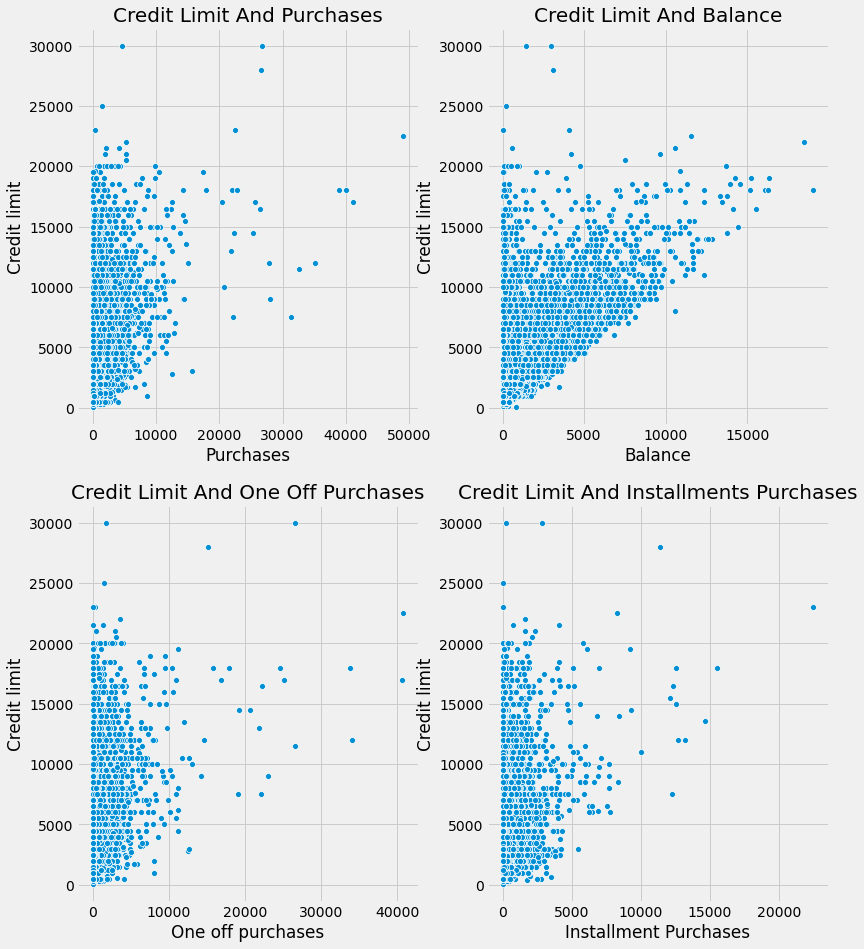

In [14]:
plt.rcParams['figure.figsize'] = (12,15)

plt.subplot(2,2,1)
sns.scatterplot(df['PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And Purchases', fontsize =20)
plt.xlabel('Purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,2)
sns.scatterplot(df['BALANCE'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And Balance', fontsize =20)
plt.xlabel('Balance')
plt.ylabel('Credit limit')

plt.subplot(2,2,3)
sns.scatterplot(df['ONEOFF_PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And One Off Purchases', fontsize =20)
plt.xlabel('One off purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,4)
sns.scatterplot(df['INSTALLMENTS_PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And Installments Purchases', fontsize =20)
plt.xlabel('Installment Purchases')
plt.ylabel('Credit limit')

> Above is the scatter plot between credit limit vs balance and different types of purchase
>> Starting with different purchase types. These are interesting scatter plots since, intuitively, we would expect purchases to go up when the credit limit goes up. Afterall why get a credit card with high limit if you are not planning on using it but the graphs shows a different story. There seems to be no strong correlation between the credit limit and these variables. In fact, purchases amount tend to stay at zero while credit limit increases. This again, shows that credit cards users really do want to keep their balance low to utilized their credit. This might signify that, for most people, credit cards are tools for credit utilization rather than spending device.

>> As for balance, there seems to be a better correlation that as credit limit goes up balance also goes up but it is also clear to see that there are also points where balance stays at zeros but credit limits do go up.

Text(0.5, 0, 'Cash Advance Frequency')

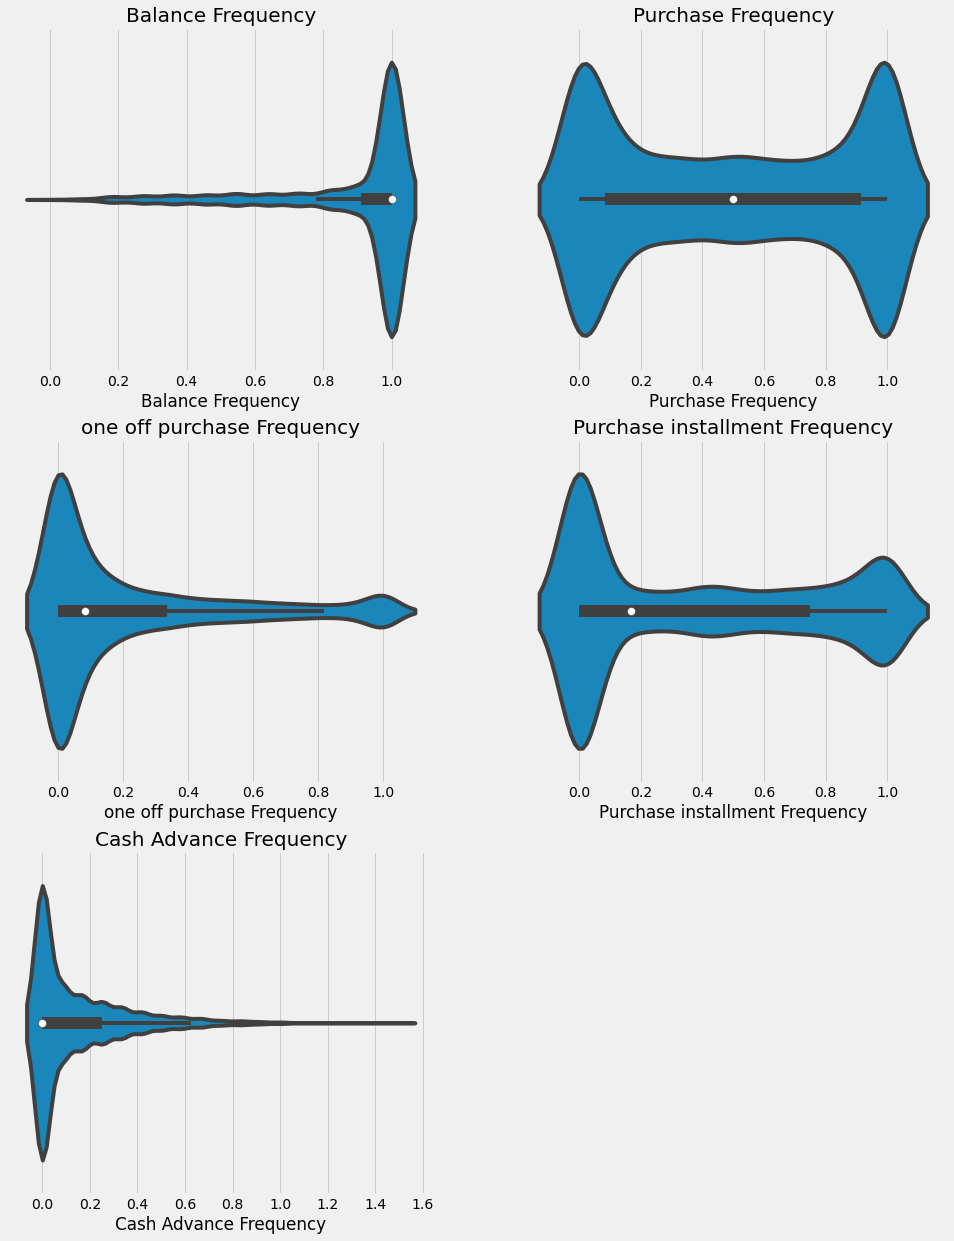

In [15]:
plt.rcParams['figure.figsize'] = (15,20)

plt.subplot(3,2,1)
sns.violinplot(df['BALANCE_FREQUENCY'])
plt.title('Balance Frequency', fontsize =20)
plt.xlabel('Balance Frequency')

plt.subplot(3,2,2)
sns.violinplot(df['PURCHASES_FREQUENCY'])
plt.title('Purchase Frequency', fontsize =20)
plt.xlabel('Purchase Frequency')

plt.subplot(3,2,3)
sns.violinplot(df['ONEOFF_PURCHASES_FREQUENCY'])
plt.title('one off purchase Frequency', fontsize =20)
plt.xlabel('one off purchase Frequency')

plt.subplot(3,2,4)
sns.violinplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'])
plt.title('Purchase installment Frequency', fontsize =20)
plt.xlabel('Purchase installment Frequency')

plt.subplot(3,2,5)
sns.violinplot(df['CASH_ADVANCE_FREQUENCY'])
plt.title('Cash Advance Frequency', fontsize =20)
plt.xlabel('Cash Advance Frequency')

>Above you can see various violin plots of the different frequency scores in this dataset. 

>This dataset includes various frequency scores (0-1) that tell use the frequency of each variables for each datapoint with 0 being the lowest score and one being the higest score. I think it would be interesting to map them out together and analyse them.

>> Starting with balance frequency. This is the measurement of how often people update their balance. As we can see, there is a very large amount of people scoring around one meaning that people do, in fact, update their balance frequently. As we have seen early their is a tendency for credit card holders to keep their balance low for credit utiliztion. The fact that a lot of people score so high might be due to the fact that these people are paying off their balance often in order to keep them low or even to have zero balance.

>> Next we have purchase frequency or how often do people make purchses. There seems to be the same number of people scoring low and high. This tell us that there seems to be equal amount of people who purchase often with their credit cards and equal number of people who rarely do. This is an interesting finding since when we look at the distribution balance earlier we could see that there are way more people with zero and low balance compare to people with high balance. Intuitively, if there are equal amount of people who purchase frequntly and people who do not, then we would expect that the distribution of balance to have both low and high number as well. Then again, we saw earlier, because of the high balance frequncy, that maybe people are just really good at paying off their credit cards. 

>>Comparing between one off purchase frequency and installment purchase frequency we can see that most of the people have around zero score meaning people rarely purchase in the first place. Looking at people who do, we can see that there are more people with higher installment frequency score than that of one off purchase. This signifys that people prefer to use installment purchase more often than one off ones.

>>Lastly we have cash advance frequency. This tell use how often people get cash advance and as we can see most people score around zero, meaning they do not get cash advance frequently.

Text(0.5, 0, 'Purchases')

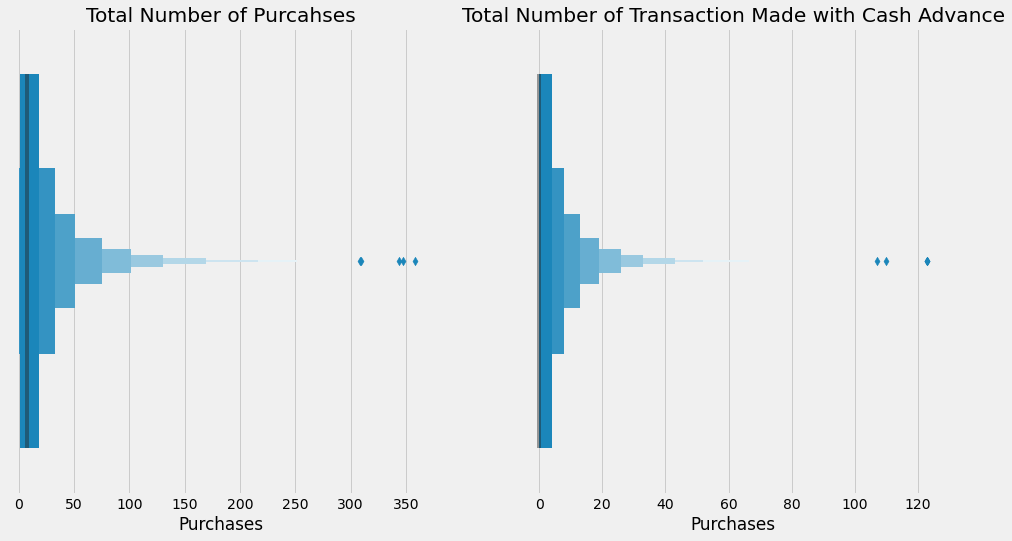

In [16]:
#ONE for purchase TRX, cash advance trx
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(1,2,1)
sns.boxenplot(df['PURCHASES_TRX'])
plt.title('Total Number of Purcahses')
plt.xlabel('Purchases')

plt.subplot(1,2,2)
sns.boxenplot(df['CASH_ADVANCE_TRX'])
plt.title('Total Number of Transaction Made with Cash Advance')
plt.xlabel('Purchases')

> Above are boxen plots of the total number of purchases and those which are done using cash in advance
>> As we would expect by now, there are a large number of people with low number of transaction since we are under the assumption that people are using credit card for credit untilization and not for purchasing. And there are only a few people purchasing at high quantity. A few people purchase over 300 times and fewer did more than 100 times with cash advance.

Text(0.5, 1.0, 'Heat Map')

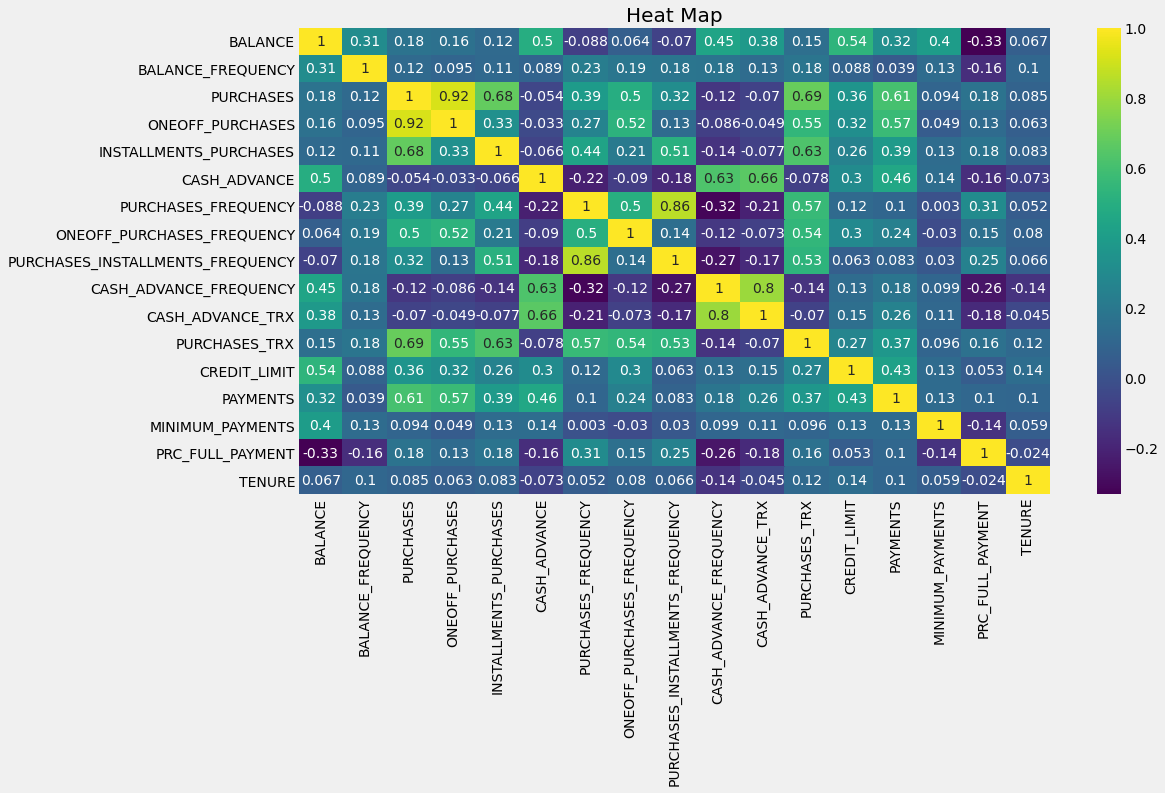

In [17]:
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.title('Heat Map', fontsize =20)

>Above is the heatmap of the dataset
>> Here we can take a closer look at the correlation with in the dataset. Purchases and one off purchase have very high correlation as we would expect at 0.92. This is the same for varaibles and their frequency score counter parts such as cash advance trx and cash advance frequency at 0.8. Not surprisingly things like balance and payment have poor correlation. This tell us that the data do make sense. 

Text(0.5, 0, 'Months')

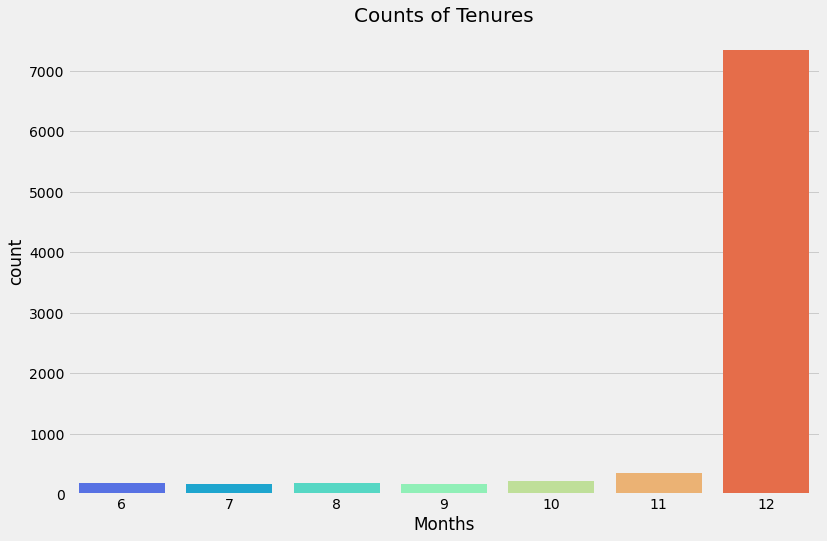

In [18]:
plt.rcParams['figure.figsize'] = (12,8)
sns.countplot(df['TENURE'], palette='rainbow')
plt.title('Counts of Tenures', fontsize = 20)
plt.xlabel('Months')

> Here we have the count plot of tenure
>> Tenure is the repayment period of the cards, ranging from 6-12 months. Interestingly most of the cards are 12 months cards. The longer your tenure the more interest rate you pay but also the more time you have to pay back and that seems to be the option that people are going for.

# Model Building

In [19]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

> Here I dedided to use StandardScaler since and not MinMaxscaler since our data tend to be skewed to the left and only a few data points on the right and StandScaler can handle outlier better

Text(0, 0.5, 'wcss')

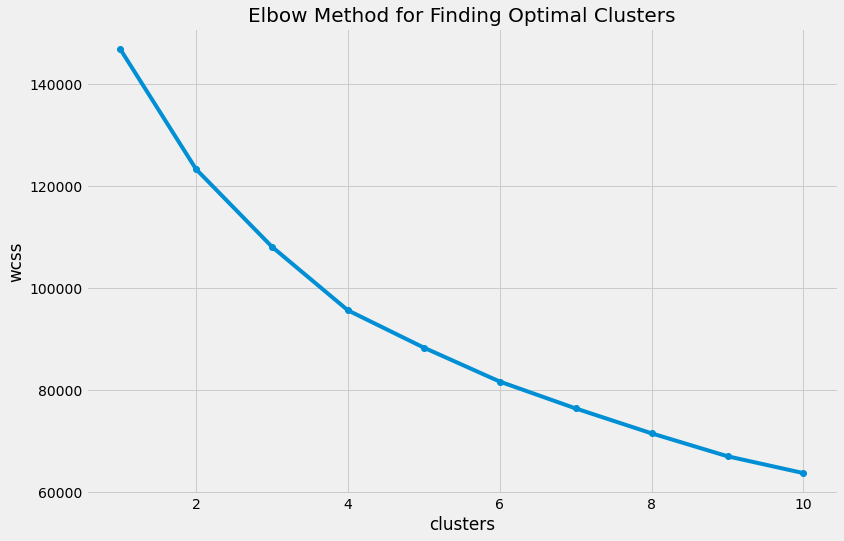

In [20]:
# model building, elbow method
from sklearn.cluster import KMeans

wcss= []

for i in range(1,11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(scaled_df)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss, marker='o')
plt.title('Elbow Method for Finding Optimal Clusters', fontsize =20)
plt.xlabel('clusters')
plt.ylabel('wcss')

> Here is the graph deplicting the elbow method used to find the optimum number clusters using kmean analysis
>> We tried different number of clusters from 1-10 and then we graph inertia or wcss (within clusters sum sqaure) against the cluster number. Inertia is basically how close the datapoints in the clusters are to the centers, which means the lower it is the more fitting the points are to their respective clusters. Here, we are trying to find the place where the wcss is as low as possible while still keeping the number of cluster as low as possible. Here the optimum number of cluster is 4 cluster since it is the place where the graph start to flatten out meaning that having higher number of cluster will not yield a much more fitting machine.

In [21]:
#Building the model at 4 clusters, add the label to the dataframe
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
label = km.fit_predict(scaled_df)

df['label'] = label

In [22]:
df['constant'] = 'constant'

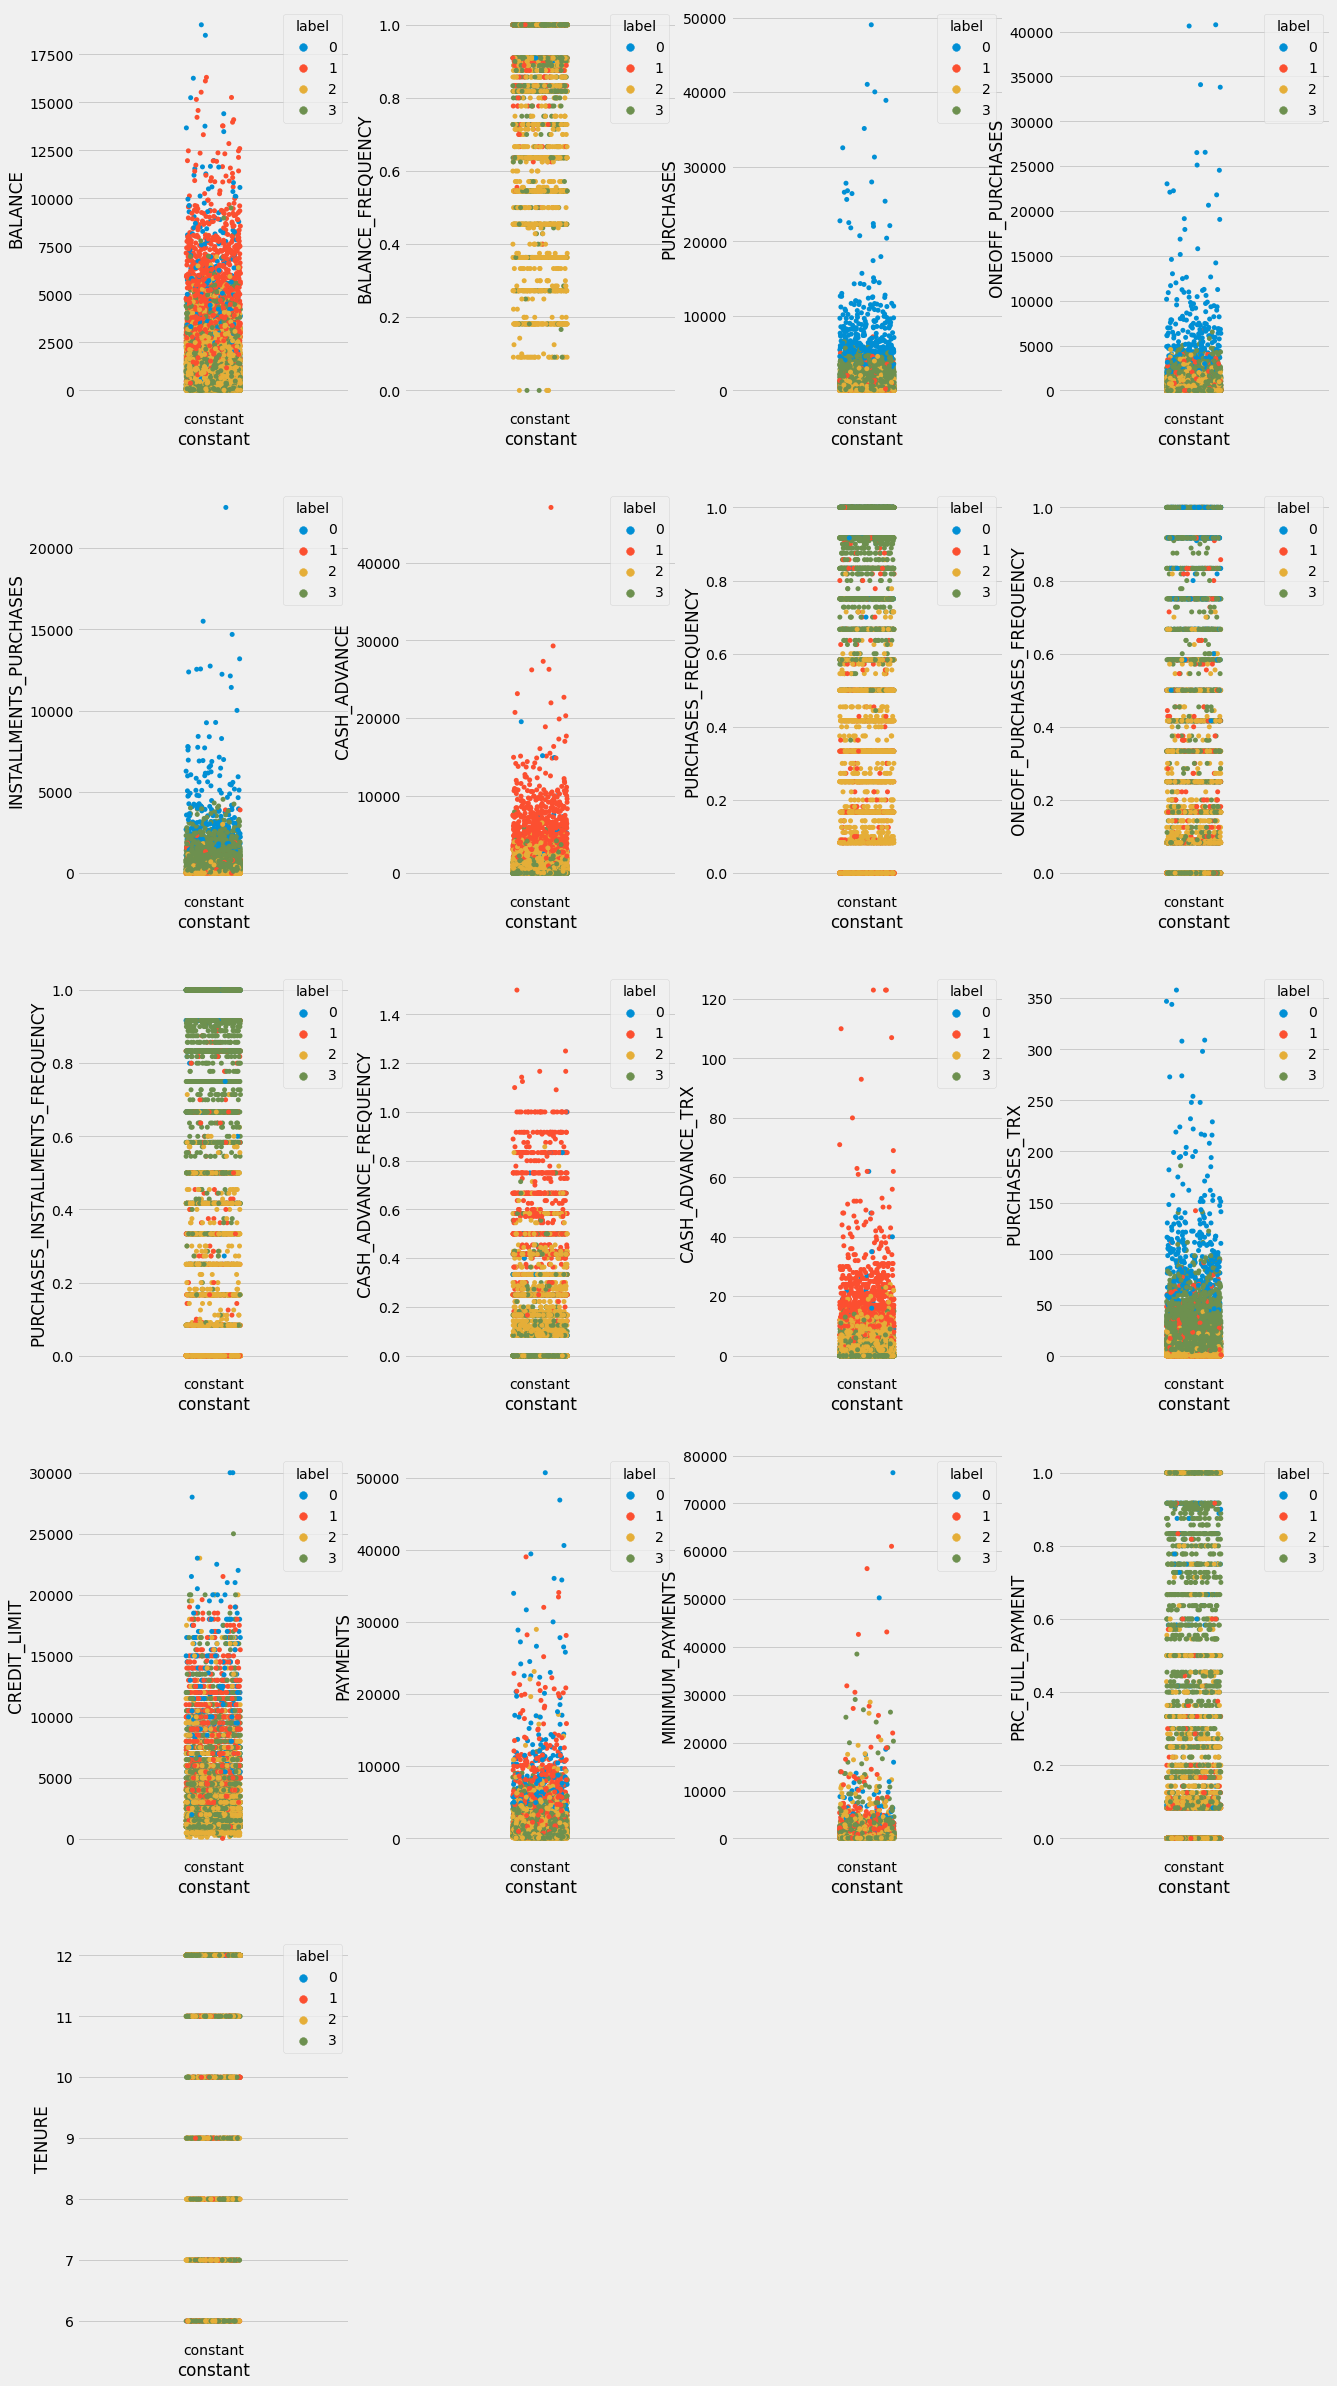

In [23]:
#EDA
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] =(20,40)

for num in range(0,17):
    ax = plt.subplot(5,4,num+1)
    col = df.columns[num]
    sns.stripplot(df['constant'],df[col], ax=ax, hue=df['label'])
    plt.xlabel('constant')

>Here we have the visual representation of the different clusters in the form of strip plots
>> From a quick glance it is clear that the 4 clusters have divide credit card users in to groups where people based on how high their purchases and balance are. Let's take a few example and take a closer look at them.

>> For example looking at balance, people are being divided into 4 groups. Cluster 0 has the highest balance, follow by cluster 1, and then cluster 2,3 arer mixed in the bottom. The same goes for purchases. Cluster 0 has the highest purchase follow by cluster 1, 2, 3 in order.

>> Cluster 0 = Highest spender, cluster 1 = Medium spender, cluster 2 =Low spender, cluster 3 =Zero balance & low spender

Text(0, 0.5, 'Purchases')

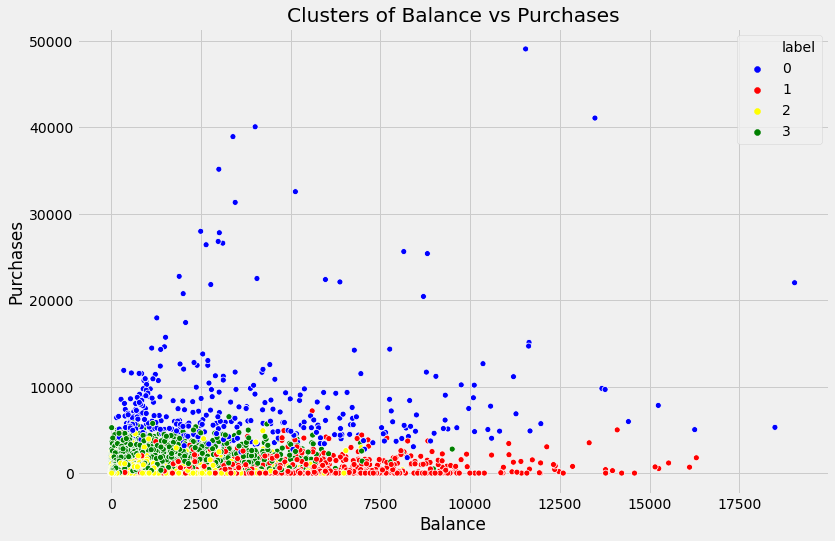

In [25]:
# A closer look at balance vs purchases with clusters centers
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df['BALANCE'],df['PURCHASES'], hue=df['label'], palette=['blue','red','yellow','green'])
plt.title('Clusters of Balance vs Purchases')
plt.xlabel('Balance')
plt.ylabel('Purchases')

> Here is the scatter plot of balance and purchases seperated by clusters
>>Here we can see that cluster 0 are high spenders with the highest balance while cluster 1 are people with higher balance but not as big of spenders. Cluster 2,3 are people who do not spend as much and have relatively lower balance (down to zero). 

# Conclusion

In conclusion, with this information from our cluster analysis, as a credit card company, we could spend more time on marketing campaigns on the right people. People in cluster 0 and 1 clearly have the capacity to spend and since they are already spending we could use their spending habits to optimize the strategies to get them to spend even more. The analysis also tells us that there is untapped potential in people from cluster 2 and 3. These people already some balance but are not purchasing as much, with the right push we might be able to get them to use the card for spending and become important sources of revenue. 